### Global Internet users

##### Global Internet users dataseti ustida tahlil olib boramiz birinchi navbatda datasetimizni uqib olamiz va kerakliy kutubxonalarni chaqiramiz

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Final.csv')
df.head()

,Unnamed: 0,Entity,Code,Year,Cellular Subscription,Internet Users(%),No. of Internet Users,Broadband Subscription
0,0,Afghanistan,AFG,1980,0.0,0.0,0,0.0
1,1,Afghanistan,AFG,1981,0.0,0.0,0,0.0
2,2,Afghanistan,AFG,1982,0.0,0.0,0,0.0
3,3,Afghanistan,AFG,1983,0.0,0.0,0,0.0
4,4,Afghanistan,AFG,1984,0.0,0.0,0,0.0


#### datasetimiz haqida tuliqroq ma'lumotlar olamiz

In [11]:
df.index

RangeIndex(start=0, stop=8867, step=1)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8867 entries, 0 to 8866
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              8867 non-null   int64  
 1   Entity                  8867 non-null   object 
 2   Code                    8867 non-null   object 
 3   Year                    8867 non-null   int64  
 4   Cellular Subscription   8867 non-null   float64
 5   Internet Users(%)       8867 non-null   float64
 6   No. of Internet Users   8867 non-null   int64  
 7   Broadband Subscription  8867 non-null   float64
dtypes: float64(3), int64(3), object(2)
memory usage: 554.3+ KB


In [13]:
df.describe()

,Unnamed: 0,Year,Cellular Subscription,Internet Users(%),No. of Internet Users,Broadband Subscription
count,8867.000000,8867.000000,8867.000000,8867.000000,8.867000e+03,8867.000000
mean,4433.000000,2000.151799,39.989614,17.043606,1.089138e+07,4.440695
std,2559.826752,11.812151,51.981410,26.883498,1.248841e+08,9.755705
min,0.000000,1980.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,2216.500000,1990.000000,0.000000,0.000000,0.000000e+00,0.000000
50%,4433.000000,2000.000000,5.501357,0.855662,1.004700e+04,0.000000
75%,6649.500000,2010.000000,82.231594,25.449939,8.664195e+05,2.007603
max,8866.000000,2020.000000,436.103027,100.000000,4.699886e+09,78.524361


#### Eng birinchi qaysi davlatlar internetdan foydalana boshlagan?

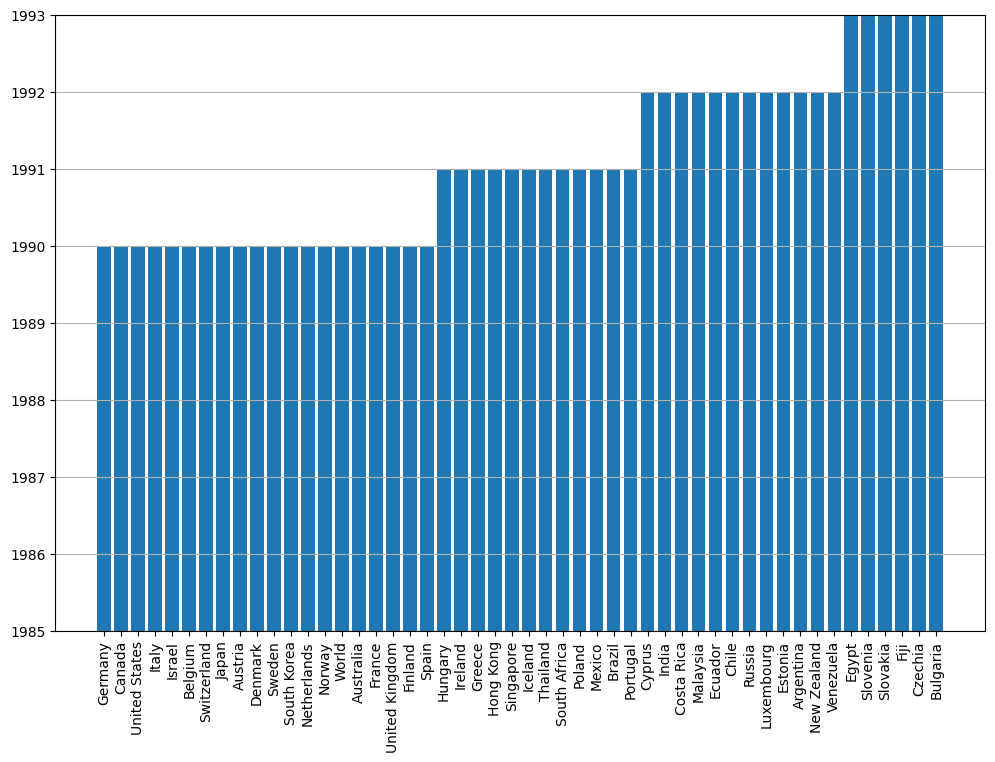

In [14]:
filtered = df[(df['No. of Internet Users'] > 0) & (df['Code'] != 'Region')]
first_years = filtered.groupby('Entity')['Year'].agg('min').sort_values(ascending=True)[:50]


fig, ax = plt.subplots(figsize=(12, 8))
plt.bar(first_years.index, first_years)
plt.xticks(rotation=90)

ax.set_ylim(int(first_years.min())-5, int(first_years.max()))
plt.grid(axis='y')
plt.show()

##### barcha davlatlar qachondan boshlab internetdan foydalana boshlagan

##### Bu jadvallarni 2-ta qilish mantiqan tug'ri bulmasligi mumkin shunchakiy urganish uchun qilindi

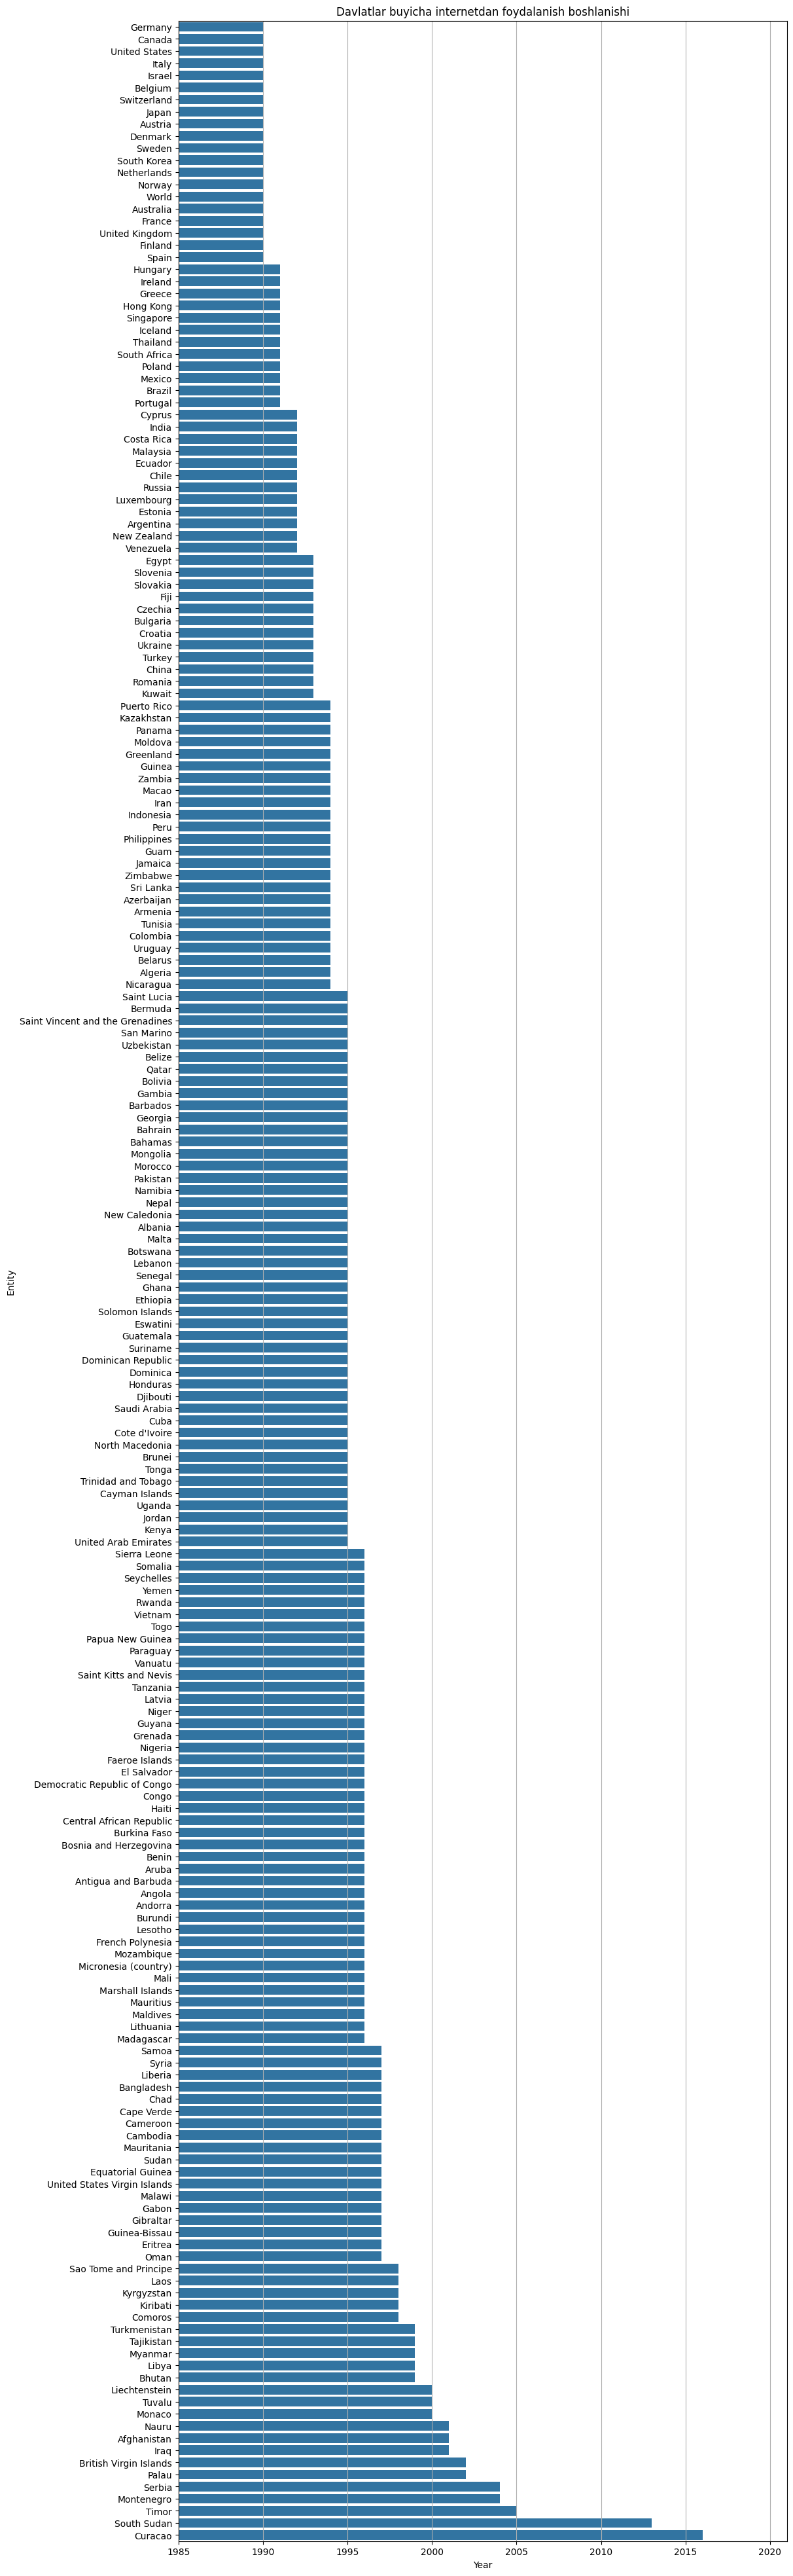

In [15]:
country_r = filtered.groupby(by='Entity')['Year'].agg('min').sort_values()


plt.figure(figsize=(12, 50))
sns.barplot(x=country_r, y=country_r.index)
plt.title("Davlatlar buyicha internetdan foydalanish boshlanishi")
plt.xlim(country_r.min() - 5, country_r.max() + 5)
plt.grid(axis='x')
plt.show()


##### Internet foydalanuvchilari yillar kesimida

##### Internet foydalanuvchilari 2020-chi yilda mamlakatlar kesimida

/tmp/ipykernel_8309/4104123000.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=on_world, y=on_world.index, palette='gist_rainbow_r', ax=ax)


(array([0.0e+00, 2.0e+08, 4.0e+08, 6.0e+08, 8.0e+08, 1.0e+09, 1.2e+09]),
 [Text(0.0, 0, '0.0'),
  Text(200000000.0, 0, '0.2'),
  Text(400000000.0, 0, '0.4'),
  Text(600000000.0, 0, '0.6'),
  Text(800000000.0, 0, '0.8'),
  Text(1000000000.0, 0, '1.0'),
  Text(1200000000.0, 0, '1.2')])

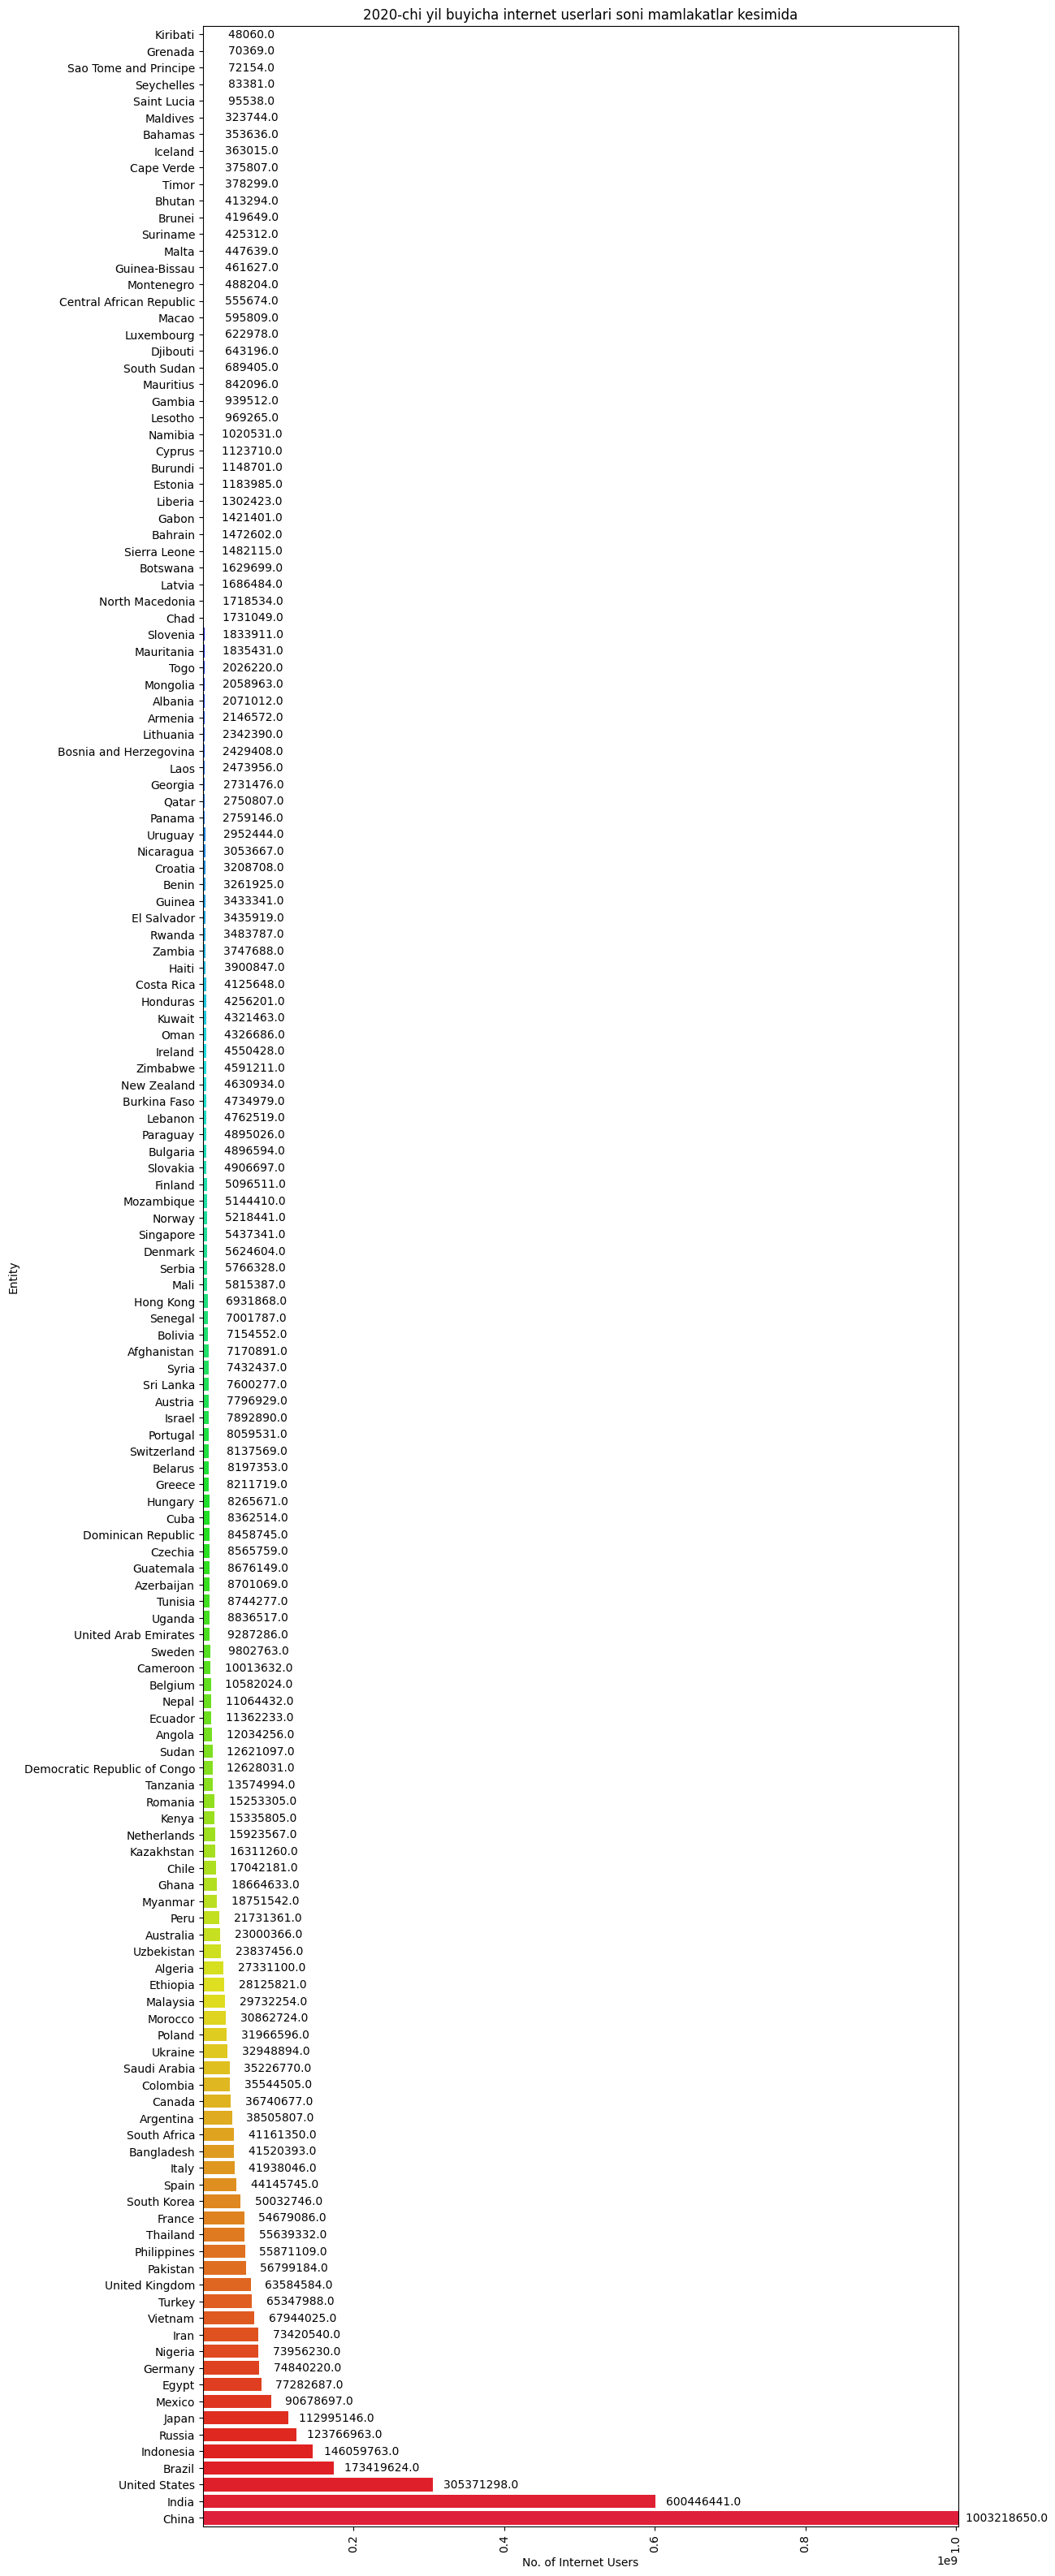

In [17]:
on_world = filtered[(filtered['Year'] == 2020) & (filtered['Entity'] != 'World')]
on_world = on_world.groupby('Entity')['No. of Internet Users'].agg(lambda x: x).sort_values(ascending=True)

mini_count = on_world.values.min()
max_count = on_world.values.max()

fig, ax = plt.subplots(figsize=(12, 40))
sns.barplot(x=on_world, y=on_world.index, palette='gist_rainbow_r', ax=ax)


for i in ax.patches:
    ax.annotate(f'                        {i.get_width()}', (i.get_width(), i.get_y() + i.get_height() / 2),
                ha='center', va='center', fontsize=10, xytext=(5, 0),
                textcoords='offset points')
plt.title('2020-chi yil buyicha internet userlari soni mamlakatlar kesimida')
ax.set(xlim=(mini_count, max_count))
plt.xticks(rotation=90)

##### Boshqa kursatgichlar yillar kesimida qanday uzgarganligini kurib chiqamiz

Text(0.5, 1.0, 'Mintaqalar buyicha yillar buyi internet foydalanuvchilari')

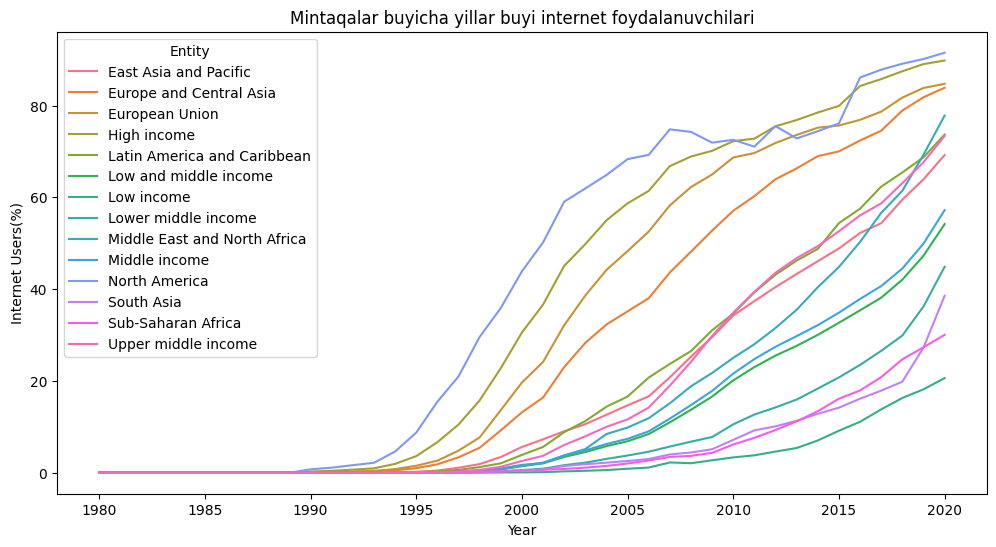

In [18]:
region_data = df[df['Code'].str.contains('Region')].copy()

plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Internet Users(%)', hue='Entity', data=region_data)
plt.title('Mintaqalar buyicha yillar buyi internet foydalanuvchilari')

Text(0.5, 1.0, 'Mintaqalar buyicha yillar davomida uyaliy internerga obuna')

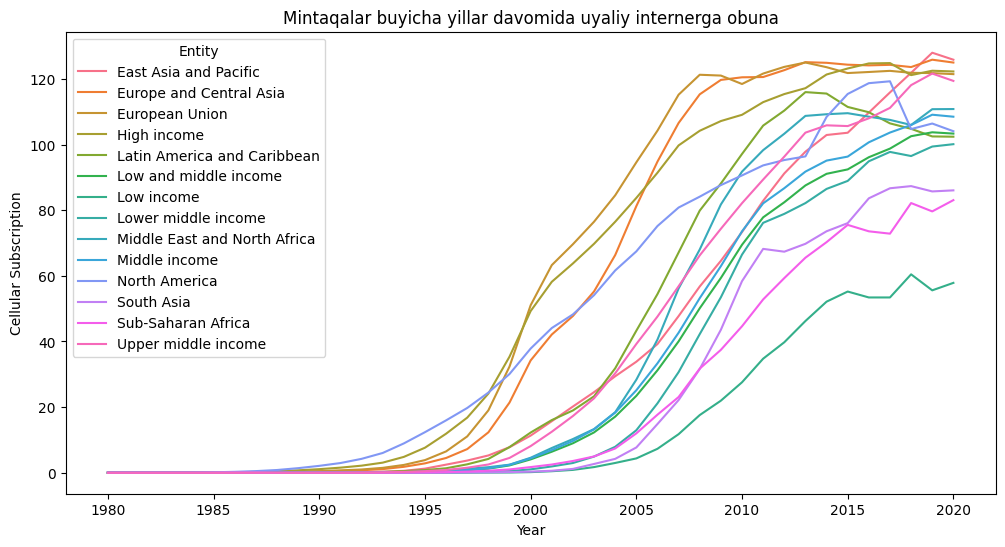

In [19]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Cellular Subscription', hue='Entity', data=region_data)
plt.title('Mintaqalar buyicha yillar davomida uyaliy internerga obuna')

Text(0.5, 1.0, 'Mintaqalar buyicha yillar davomida keng_polosali obuna')

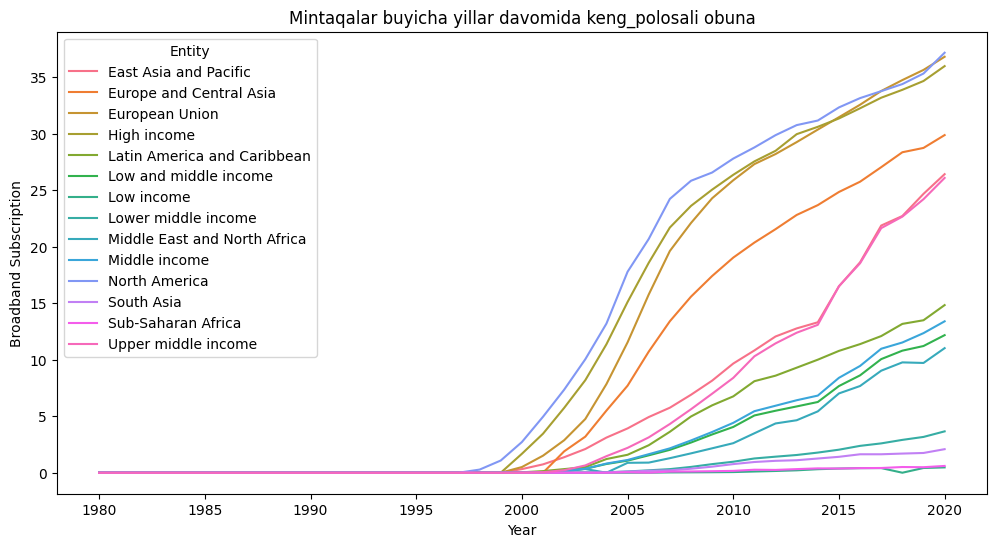

In [20]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Broadband Subscription', hue='Entity', data=region_data)
plt.title('Mintaqalar buyicha yillar davomida keng_polosali obuna')